# iSWAP-like gate
> @author: Jiheng Duan

## About

This document will tell you how to simulated a 2-qubit iSWAP like gate

### Required Import

**The following thing must be import.**

In the current folder (despite `~\Tutorial\arb_qubit_tutorial\`), the system structure are based on file `~\System\transmon_system.py`. For using arbitrary qubit system structure, please move to the demonstration file under `~\Tutorial\arb_qubit_tutorial\`.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# This on is a path correcting code, which is used to find the path of QuSim.
sys.path.append('../..')

import QuSim.System.transmon_system as qs
# Some useful tools
import QuSim.Instruments.tools as tools
# Some intrinsic plotting function
import QuSim.DataPlot.plot_lib as pl

### Optional import

**The following import are optional**

In [55]:
# Print the full output
np.set_printoptions(threshold=sys.maxsize)

# auto reload
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Trial1 
### Setup system

In [70]:
N = 4 # Maximum excitation level
w = [6.3, 6.65, 6.2] # Qubit frequency
q_dim = [4 for _ in range(len(w))]
alpha =[-0.3, -0.3, -0.2] # Anharmonicity
r_dic = {
    "r12": 0.05,
    "r13": -0.005,
    "r23": 0.05
}
r = tools.r2matrix(r_dic, w) # Coupling strength
gamma_list = None

_system = qs.qubit_system(N, q_dim, w, alpha, r, gamma_list)

state_010, E_010, index_010 = _system.get_eigenstates_energy((0,1,0))
state_000, E_000, index_000 = _system.get_eigenstates_energy((0,0,0))
state_001, E_001, index_001 = _system.get_eigenstates_energy((0,0,1))
state_100, E_100, index_100 = _system.get_eigenstates_energy((1,0,0))
state_101, E_101, index_101 = _system.get_eigenstates_energy((1,0,1))

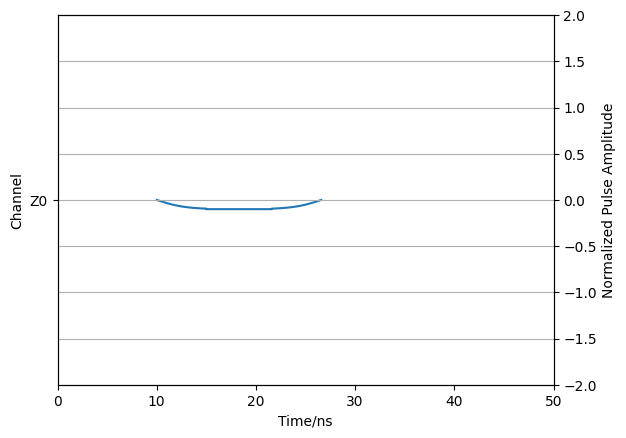

0

In [135]:
simulation_option = {
    "simulation_time": 50, # Unit in ns
    "simulation_step": 6000,
    "initial_state": [state_100] # Do multiple simulation
}
pulse_sequence = [
    {
        'pulse_index': 1,
        'type': "Z", # 'XY' or 'Z'
        'pulse_shape': "tanh", # See PulseGen/pulse_shape.py
        't_delay': 10, # unit in ns
        't_width': 10, # unit in ns
        't_plateau': 6.6, # unit in ns
        'freq': 0, # unit in GHz; Z pulse does not use it
        'pulse_detuning': 0,
        'phase': 0, # unit in rad;
        'amplitude': -0.1, # Z: biased frequency
        'q_index': 0, # 0, 1, 2
        'epsilon': 0.88
    }
]
pl.plot_pulse_sequence(pulse_sequence, simulation_option)

In [140]:
result_list, angle_list = _system.system_dynamics_mesolve(simulation_option, pulse_sequence)

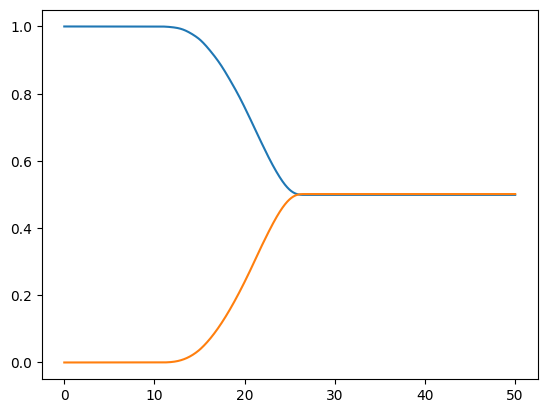

In [141]:
result = result_list[0]
data_list = _system.get_data_list(result, simulation_option, [state_100, state_001])
tlist = np.linspace(0, simulation_option['simulation_time'], simulation_option['simulation_step'])
data_list= np.transpose(data_list)
plt.plot(tlist, data_list)

In [138]:
prop_result = _system.system_dynamics_propagator(simulation_option, pulse_sequence)

12.5%. Run time:  10.07s. Est. time left: 00:00:01:10
21.9%. Run time:  10.90s. Est. time left: 00:00:00:38
31.2%. Run time:  12.98s. Est. time left: 00:00:00:28
40.6%. Run time:  14.50s. Est. time left: 00:00:00:21
50.0%. Run time:  15.43s. Est. time left: 00:00:00:15
62.5%. Run time:  19.08s. Est. time left: 00:00:00:11
71.9%. Run time:  19.53s. Est. time left: 00:00:00:07
81.2%. Run time:  23.02s. Est. time left: 00:00:00:05
90.6%. Run time:  23.96s. Est. time left: 00:00:00:02
100.0%. Run time:  25.36s. Est. time left: 00:00:00:00
Total run time:  25.40s


In [139]:
prop_result[-1]

Quantum object: dims = [[32], [32]], shape = (32, 32), type = oper, isherm = False
Qobj data =
[[ 9.92463552e-01+1.22353875e-01j  0.00000000e+00+0.00000000e+00j
   8.98078653e-04-4.19166902e-04j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -3.90354546e-04-2.61811823e-03j
   0.00000000e+00+0.00000000e+00j  8.34006442e-06+1.14025181e-05j
   1.66427796e-03-1.12308551e-03j  0.00000000e+00+0.00000000e+00j
   8.09817849e-06+1.23576131e-05j  0.00000000e+00+0.00000000e+00j
   5.36931041e-06+1.41079024e-05j  0.00000000e+00+0.00000000e+00j
  -3.01869468e-05+5.42346317e-04j  0.00000000e+00+0.00000000e+00j
  -4.59070305e-06-5.75326821e-08j -4.82863465e-03-3.03464404e-03j
   0.00000000e+00+0.00000000e+00j -9.14087023e-06-1.39415946e-07j
   0.00000000e+00+0.00000000e+00j -2.14812784e-06+2.84369938e-05j
   8.55453295e-06-8.63882955e-06j -5.63711857e-04-3.48350358e-04j
   0.00000000e+00+0.00000000e+00j -2.56793090e-06+1.98290208e-07j
   0.00000000e+00+0.00000000e+00j -1.06986990e-

### Scan zero effective coupling

In [ ]:
def closest_to_zero_index(lst):
    # Check if the list is empty
    if not lst:
        return None

    # Find the index of the element closest to zero
    min_index = 0
    min_difference = abs(lst[0])

    for i in range(1, len(lst)):
        current_difference = abs(lst[i])
        if current_difference < min_difference:
            min_difference = current_difference
            min_index = i

    return min_index

In [22]:
w_scan = [6.3, 6.65, 6.2]
wc_scan = np.linspace(6.252,6.253,10000)
r_effect_list = []
for wc in wc_scan:
    w_scan[1] = wc
    delta1, delta2 = w_scan[0] - w_scan[1], w_scan[2] - w_scan[1]
    delta = 1/(1/delta1 + 1/delta2)
    r_effect = r_dic['r12'] * r_dic['r23']/delta + r_dic['r13']
    r_effect_list.append(r_effect)
index_wc = closest_to_zero_index(r_effect_list)

Text(0.5, 0, '$\\omega_c$ (GHz)')

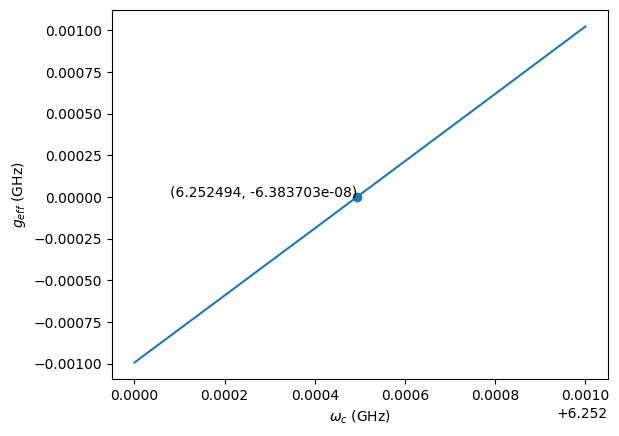

In [28]:
plt.plot(wc_scan, r_effect_list)
plt.scatter(wc_scan[index_wc], r_effect_list[index_wc])
plt.text(wc_scan[index_wc], r_effect_list[index_wc], f'({np.round(wc_scan[index_wc],6)}, {np.round(r_effect_list[index_wc],15)})', ha='right')
plt.ylabel('$g_{eff}$ (GHz)')
plt.xlabel('$\omega_c$ (GHz)')

### Scan effective eigenstate

In [31]:
energy_plus = []
energy_minus = []
w_scan = [6.3, 6.2, 6.2]
wc_scan = np.linspace(6.21,6.29,10000)
for wc in wc_scan:
    w_scan[1] = wc
    delta1, delta2 = w_scan[0] - w_scan[1], w_scan[2] - w_scan[1]
    delta = 1/(1/delta1 + 1/delta2)
    w1_eff = w[0] + r_dic['r12']**2/delta1
    w2_eff = w[2] + r_dic['r23']**2/delta2
    energy_plus.append(w1_eff+w2_eff)
    energy_minus.append(w1_eff-w2_eff)

Text(0.5, 0, '$\\omega_c$ (GHz)')

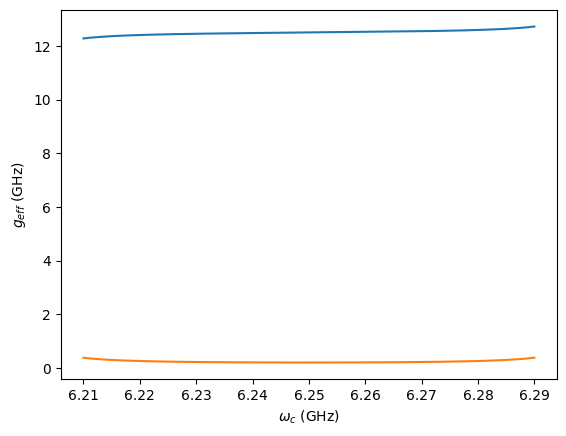

In [32]:
plt.plot(wc_scan, energy_plus, label = '$|10\rangle+|01\rangle$')
plt.plot(wc_scan, energy_minus, label = '$|10\rangle-|01\rangle$')

plt.ylabel('$g_{eff}$ (GHz)')
plt.xlabel('$\omega_c$ (GHz)')

## Trial 2, from Zhen Chen

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# This on is a path correcting code, which is used to find the path of QuSim.
sys.path.append('../..')

import QuSim.System.transmon_system as qs
# Some useful tools
import QuSim.Instruments.tools as tools
# Some intrinsic plotting function
import QuSim.DataPlot.plot_lib as pl

def var_name2str(variable):
    def nested_var_name2str(value):
        if isinstance(value, list):
            return [nested_var_name2str(item) for item in value]
        else:
            for name in globals():
                if eval(name) == value:
                    return name
            return str(value)
    return nested_var_name2str(variable)

# Print the full output
np.set_printoptions(threshold=sys.maxsize)

# auto reload
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
N = None # Maximum excitation level
w = [4,5,4] # Qubit frequency, GHz and sorted by Q0,C0,Q1
q_dim = [2 for _ in range(len(w))] # qubit dimension
# q_dim = [3, 2, 3]
alpha =[-0.2,-0.1,-0.2] # Anharmonicity
cc = 200   # capacitance of C0
c0 = 70   # capacitance of Q0
c1 = 72   # capacitance of Q1
c0c = 4    # capacitance between Q0 and C0
c1c = 4.2    # capacitance between Q1 and C0
c12 = 0.1 # capacitance between Q0 and Q1
g0c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[0]*w[1]) # coupling strength between Q0 and C0
g1c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[2]*w[1]) # coupling strength between Q1 and C0
g01 = 1/2*(c12/np.sqrt(c0*c1)+c0c*c1c/np.sqrt(c0*c1*cc**2))*np.sqrt(w[0]*w[2]) # coupling strength between Q0 and Q1


r_dic = {
    "r12": g0c,
    "r13": g01,
    "r23": g1c
}

r = tools.r2matrix(r_dic, w) # Coupling strength
gamma_list = None

_system = qs.qubit_system(N, q_dim, w, alpha, r, gamma_list)

# index_000 = _system.state_dic[1][(0,0,0)]
# state_000 = _system.H.eigenstates()[1][index_000]
# E_000 = _system.H.eigenstates()[0][index_000]/2/np.pi

# index_100 = _system.state_dic[1][(1,0,0)]
# state_100 = _system.H.eigenstates()[1][index_100]
# E_100 = _system.H.eigenstates()[0][index_100]/2/np.pi

# index_001 = _system.state_dic[1][(0,0,1)]
# state_001 = _system.H.eigenstates()[1][index_001]
# E_001 = _system.H.eigenstates()[0][index_001]/2/np.pi

# index_010 = _system.state_dic[1][(0,1,0)]
# state_010 = _system.H.eigenstates()[1][index_010]
# E_010 = _system.H.eigenstates()[0][index_010]/2/np.pi

# index_110 = _system.state_dic[1][(1,1,0)]
# state_110 = _system.H.eigenstates()[1][index_110]
# E_110 = _system.H.eigenstates()[0][index_110]/2/np.pi

# index_011 = _system.state_dic[1][(0,1,1)]
# state_011 = _system.H.eigenstates()[1][index_011]
# E_011 = _system.H.eigenstates()[0][index_010]/2/np.pi

# index_101 = _system.state_dic[1][(1,0,1)]
# state_101 = _system.H.eigenstates()[1][index_101]
# E_101 = _system.H.eigenstates()[0][index_101]/2/np.pi

# index_111 = _system.state_dic[1][(1,1,1)]
# state_111 = _system.H.eigenstates()[1][index_111]
# E_111 = _system.H.eigenstates()[0][index_111]/2/np.pi

state_010, E_010, index_010 = _system.get_eigenstates_energy((0,1,0))
state_000, E_000, index_000 = _system.get_eigenstates_energy((0,0,0))
state_010, E_001, index_001 = _system.get_eigenstates_energy((0,0,1))
state_100, E_100, index_100 = _system.get_eigenstates_energy((1,0,0))
state_101, E_101, index_101 = _system.get_eigenstates_energy((1,0,1))
state_011, E_011, index_011 = _system.get_eigenstates_energy((0,1,1))
state_110, E_110, index_110 = _system.get_eigenstates_energy((1,1,0))
state_111, E_111, index_111 = _system.get_eigenstates_energy((1,1,1))

In [15]:
index_000,index_100,index_001,index_010,index_101,index_110,index_011, index_111

(0, 1, 2, 3, 4, 5, 6, 7)

In [20]:
(state_100 - state_001 )/np.sqrt(2)
(state_100 + state_001)/np.sqrt(2)

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.99717722]
 [-0.07457004]
 [ 0.        ]
 [-0.00282278]
 [ 0.        ]
 [ 0.        ]
 [-0.008302  ]]

In [22]:
(state_100+state_110)/np.sqrt(2)

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.49717722]
 [-0.07457004]
 [-0.5       ]
 [ 0.49717722]
 [ 0.        ]
 [ 0.5       ]
 [-0.008302  ]]

In [23]:
(state_001+state_011)/np.sqrt(2)

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[-0.00837871]
 [ 0.5       ]
 [ 0.        ]
 [-0.49722592]
 [-0.5       ]
 [-0.07390919]
 [-0.49722592]
 [ 0.        ]]

In [3]:
num_level = 3 # Num of level we want to see
w2_scan_space= np.linspace(4.5, 7, 1000)   # scan coupler frequency
energy_level_list = []
for w2 in w2_scan_space:
    dummy_list = []
    w[1] = w2
    _system = qs.qubit_system(N, q_dim, w, alpha, r, gamma_list)
    for j in range(0,num_level):
        dummy_list.append((_system.H.eigenenergies()[j] / np.pi/2).real)

    energy_level_list.append(dummy_list)

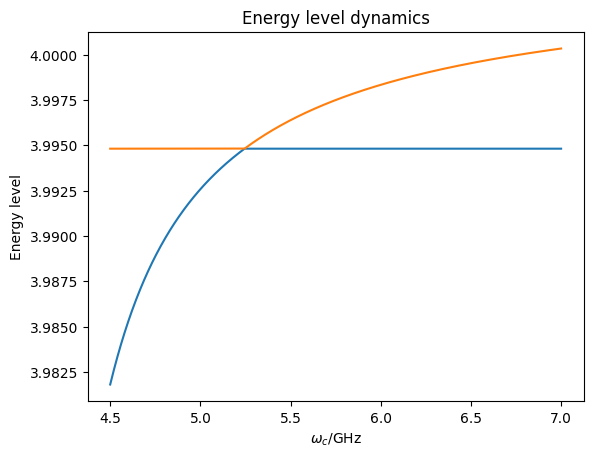

In [8]:
%matplotlib inline
label = "\omega_c"
for j in range(1,3):
    plt.plot(w2_scan_space, [v[j] for v in energy_level_list])
plt.xlabel('${}$/GHz'.format(label))
plt.ylabel('Energy level')
plt.title("Energy level dynamics")
plt.show()

In [72]:
state_tuple = (1,0,1)
q_dim = _system.q_dim

def tensor_cal(n,m,dim_m):
    return n*dim_m + m


def cal_state_index(n_tuple):
    index = 0
    dummy_list = []
    dummy_list.append(n_tuple[0])
    for ii in range(len(q_dim)-1):
        n = dummy_list[ii]
        m = n_tuple[ii+1]
        dim_m = q_dim[ii+1]
        k = tensor_cal(n,m,dim_m)
        dummy_list.append(k)

    return dummy_list[-1]

cal_state_index((1,0,0))

4